In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
import numpy as np
from datetime import datetime
from geopy.geocoders import Nominatim
import geopy.distance

# Preprocessing and feature engineering

In [43]:
b=pd.read_csv('F:/data science/THE FINAL PROJECT/flight price/business.csv')
b['class']=b['airline'].apply(lambda x : 'business' )
b

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business


In [44]:
int(b['price'][0].replace(',',''))+int(b['price'][0].replace(',',''))

51224

In [45]:
'-'+str(b['num_code'][0])

'-868'

In [46]:
e=pd.read_csv('F:/data science/THE FINAL PROJECT/flight price/economy.csv')
e['class']=e['airline'].apply(lambda x : 'economy' )
e

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economy
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economy
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy


In [47]:
e['price'][0]

'5,953'

In [48]:
fp = pd.concat([b,e]).drop_duplicates()
 

fp = fp.reset_index(drop=True)
fp

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business
...,...,...,...,...,...,...,...,...,...,...,...,...
300254,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economy
300255,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economy
300256,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy
300257,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy


In [49]:
type(fp['price'][0])

str

In [50]:
fp['price']=fp['price'].apply(lambda x : int(x.replace(',','')))

In [51]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300259 non-null  object
 1   airline     300259 non-null  object
 2   ch_code     300259 non-null  object
 3   num_code    300259 non-null  int64 
 4   dep_time    300259 non-null  object
 5   from        300259 non-null  object
 6   time_taken  300259 non-null  object
 7   stop        300259 non-null  object
 8   arr_time    300259 non-null  object
 9   to          300259 non-null  object
 10  price       300259 non-null  int64 
 11  class       300259 non-null  object
dtypes: int64(2), object(10)
memory usage: 27.5+ MB


In [52]:
def ifstop(stop):
    if str(stop)=='non-stop ':
        return '0'
    elif str(stop)=='2+-stop':
        return '2 or more'
    else:
        return '1'

In [53]:
fp['if_stop']=fp.stop.apply(ifstop)

In [54]:
fp.if_stop.value_counts()

1            250927
0             36044
2 or more     13288
Name: if_stop, dtype: int64

In [55]:
fp.stop.value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243601
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

In [56]:
fp['num_code']=fp['num_code'].astype(str)

In [57]:
fp['flight code']=fp['ch_code']+'-'+fp['num_code']
fp.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,if_stop,flight code
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,business,0,AI-868
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,business,0,AI-624
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,42220,business,1,AI-531
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,44450,business,1,AI-839
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,46690,business,1,AI-544


In [58]:
fp['time_taken'].value_counts()

02h 10m    4242
02h 15m    4036
02h 45m    2879
02h 05m    2755
02h 50m    2323
           ... 
38h 45m       1
1.01h m       1
1.02h m       1
38h 30m       1
41h 30m       1
Name: time_taken, Length: 483, dtype: int64

In [59]:
n=[]
for i in fp['time_taken']:
    n.append(str(i).split(' ')[1])
    
pd.Series(n).unique()

array(['00m', '15m', '45m', '30m', '40m', '10m', '55m', '25m', '50m',
       '35m', '20m', '05m', '04m', 'm', '59m', '24m'], dtype=object)

In [60]:
fp['time_taken'][209202]

'01h 00m'

In [61]:
x=fp['time_taken'][209202]
x=x.replace('h','').replace('m','')
float( x.split(' ')[0].replace('0',''))  + float(x.split(' ')[1])/60
#type(x)
#x=str( x ).replace('h','').replace('m','')
#float( x.split(' ')[0].replace('0','')) +float(x.split(' ')[1])/60 

1.0

In [62]:
for i in x:
    if type(i)!=float:
        print(i)

0
1
 
0
0


In [63]:
x=[]
for d in list(fp['time_taken']):
    d = d.replace('h','').replace('m','')
    if '.' in d: 
        x.append(d)
    elif d.split(' ')[0][0]=='0' :
        try:
            d= float( d.split(' ')[0].replace('0',''))  + float(d.split(' ')[1])/60
            x.append(d)
        except:
            d= float(d.split(' ')[1])/60
            x.append(d)
    else:
        d=float( d.split(' ')[0] ) + float(d.split(' ')[1])/60
        x.append(d)

In [64]:
len(x)

300259

In [65]:
len(fp['time_taken'])

300259

In [66]:
fp['flight duration']=pd.Series(x)
fp

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,if_stop,flight code,flight duration
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,business,0,AI-868,2.0
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,business,0,AI-624,2.25
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,42220,business,1,AI-531,24.75
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,44450,business,1,AI-839,26.5
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,46690,business,1,AI-544,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300254,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7697,economy,1,UK-832,13.833333
300255,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7709,economy,1,UK-832,13.833333
300256,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640,economy,1,UK-826,20.583333
300257,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640,economy,1,UK-822,23.333333


In [67]:
str(fp['time_taken'][0]).replace('h','').replace('m','')

'02 00'

In [68]:
str(fp['time_taken'][7]).split(' ')[0][0]=='0'

False

In [69]:
birthday = datetime.now()
diff = (datetime.strptime(fp['date'][93767], '%d-%m-%Y') - birthday).days
diff

-301

In [70]:
bookingday = datetime(2022, 2, 10, 0, 0, 0)

fp['days left']=fp['date'].apply(lambda x : (datetime.strptime(x, '%d-%m-%Y') - bookingday).days )

In [71]:
fp.loc[ (fp['price'] == 41113) & (fp['flight duration']==12.5)]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,if_stop,flight code,flight duration,days left
4926,28-03-2022,Air India,AI,839,21:10,Delhi,12h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:40,Mumbai,41113,business,1,AI-839,12.5,46
5143,30-03-2022,Air India,AI,839,21:10,Delhi,12h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:40,Mumbai,41113,business,1,AI-839,12.5,48
5247,31-03-2022,Air India,AI,839,21:10,Delhi,12h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:40,Mumbai,41113,business,1,AI-839,12.5,49


In [72]:
def weekend (date):
    if datetime.strptime(date, '%d-%m-%Y').weekday() == 5 or datetime.strptime(date, '%d-%m-%Y').weekday() == 6:
        return 1
    else:
        return 0

In [73]:
fp['weekends']=fp['date'].apply(weekend)

In [74]:
def daypart(time):
    time=datetime.strptime(time, '%H:%M').time()
    if time >= (datetime.strptime('06:00', '%H:%M').time()) and time < datetime.strptime('09:00', '%H:%M').time():
        return 'Early morning'
    elif time >= (datetime.strptime('09:00', '%H:%M').time()) and time < datetime.strptime('12:00', '%H:%M').time():
        return 'Morning'
    if time >= (datetime.strptime('12:00', '%H:%M').time()) and time < datetime.strptime('18:00', '%H:%M').time():
        return 'Afternoon'
    if time >= (datetime.strptime('18:00', '%H:%M').time()) and time < datetime.strptime('22:00', '%H:%M').time():
        return 'Evening'
    else:
        return 'Night'

In [75]:
fp['departure time']=fp['dep_time'].apply(daypart)
fp['arriving time']=fp['arr_time'].apply(daypart)

In [76]:
fp

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,if_stop,flight code,flight duration,days left,weekends,departure time,arriving time
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,business,0,AI-868,2.0,1,0,Evening,Evening
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,business,0,AI-624,2.25,1,0,Evening,Evening
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,42220,business,1,AI-531,24.75,1,0,Evening,Evening
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,44450,business,1,AI-839,26.5,1,0,Evening,Night
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,46690,business,1,AI-544,6.666667,1,0,Afternoon,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300254,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7697,economy,1,UK-832,13.833333,49,0,Early morning,Evening
300255,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7709,economy,1,UK-832,13.833333,49,0,Early morning,Evening
300256,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640,economy,1,UK-826,20.583333,49,0,Afternoon,Morning
300257,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640,economy,1,UK-822,23.333333,49,0,Morning,Morning


In [80]:
'PAT' in '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t       '

True

In [81]:
fp['price'].value_counts()

54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
15239       1
15359       1
16595       1
17250       1
6541        1
Name: price, Length: 12165, dtype: int64

In [79]:
fp['stop'].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243601
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

In [77]:
t_states=list(fp['to'].unique())
f_states=list(fp['from'].unique())

In [78]:
loc = Nominatim(user_agent="GetLoc")
dict={}
for f in f_states:
   for t in t_states:
      
      Loc1 = loc.geocode(f"{f} airport")
      Loc2 = loc.geocode(f"{t} airport")

      state1=(Loc1.latitude ,Loc1.longitude)
      state2=(Loc2.latitude,Loc2.longitude)
      
      v=(geopy.distance.geodesic(state1, state2).km)
      dict[f"{f} to {t}"] = round(v,2)
            

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Bangalore+airport&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [ ]:
distance = f"{fp.iloc[0]['from']} to {fp.iloc[0]['to']}"
dict[distance]

1133.85

In [ ]:
dist=[]
for i in range(300259):
    f=fp['from'][i]
    t=fp['to'][i]
    distance = f"{f} to {t}"
    dist.append(dict[distance])

In [ ]:
len(dist)

300259

In [ ]:
x = round(5.76543, 2)
print(x)

5.77


In [ ]:
def dis(f,t):
    
    # calling the Nominatim tool
    loc = Nominatim(user_agent="GetLoc")
    
    # entering the location name
    Loc1 = loc.geocode(f)
    Loc2 = loc.geocode(t)
   

    # getting latitude and longitude
    state1=(Loc1.latitude ,Loc1.longitude)
    state2=(Loc2.latitude,Loc2.longitude)
    
    return (geopy.distance.geodesic(state1, state2).km)

In [ ]:
#fp['distance']=fp.apply(dist, args=(fp['from'], fp['to']), axis=1)
#fp[['from','to']].apply(dis)

In [ ]:
fp['distance']=pd.Series(dist)

In [ ]:
fp.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,if_stop,flight code,flight duration,days left,weekends,departure time,arriving time,distance
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,business,0,AI-868,2.0,1,0,Evening,Evening,1133.85
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,business,0,AI-624,2.25,1,0,Evening,Evening,1133.85
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,42220,business,1,AI-531,24.75,1,0,Evening,Evening,1133.85
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,44450,business,1,AI-839,26.5,1,0,Evening,Night,1133.85
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,46690,business,1,AI-544,6.666667,1,0,Afternoon,Night,1133.85


In [ ]:
df=fp[['date','airline','flight code','departure time','arriving time','flight duration','from','to','class','if_stop','price','days left','weekends','distance']]

In [ ]:
df['if_stop'].value_counts()

1            250927
0             36044
2 or more     13288
Name: if_stop, dtype: int64

In [59]:
fp.loc[ ((fp['from'] == 'Mumbai') & (fp['to'] == 'Delhi')) & ((fp['if_stop'] == '1') | (fp['if_stop'] == '2 or more'))]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,if_stop,flight code,flight duration,days left,weekends,departure time,arriving time,distance
18318,11-02-2022,Air India,AI,631,19:20,Mumbai,14h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:25,Delhi,36484,business,1,AI-631,14.083333,1,0,Evening,Morning,1133.85
18319,11-02-2022,Air India,AI,637,18:35,Mumbai,05h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Delhi,37274,business,1,AI-637,5.333333,1,0,Evening,Night,1133.85
18322,11-02-2022,Air India,AI,619,20:15,Mumbai,17h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:50,Delhi,44438,business,1,AI-619,17.583333,1,0,Evening,Afternoon,1133.85
18323,11-02-2022,Air India,AI,619,20:15,Mumbai,22h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:30,Delhi,44438,business,1,AI-619,22.25,1,0,Evening,Evening,1133.85
18324,11-02-2022,Vistara,UK,875,19:20,Mumbai,13h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:00,Delhi,49468,business,1,UK-875,13.666667,1,0,Evening,Morning,1133.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146310,31-03-2022,GO FIRST,G8,520,21:00,Mumbai,11h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:05,Delhi,7718,economy,1,G8-520,11.083333,49,0,Evening,Early morning,1133.85
146311,31-03-2022,GO FIRST,G8,3184,12:00,Mumbai,07h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:20,Delhi,9092,economy,1,G8-3184,7.333333,49,0,Afternoon,Evening,1133.85
146312,31-03-2022,GO FIRST,G8,3184,12:00,Mumbai,07h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Delhi,9092,economy,1,G8-3184,7.833333,49,0,Afternoon,Evening,1133.85
146313,31-03-2022,GO FIRST,G8,3184,12:00,Mumbai,08h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:50,Delhi,9092,economy,1,G8-3184,8.833333,49,0,Afternoon,Evening,1133.85


# Analysis

### Does price vary with Airlines?

<AxesSubplot:xlabel='airline', ylabel='price'>

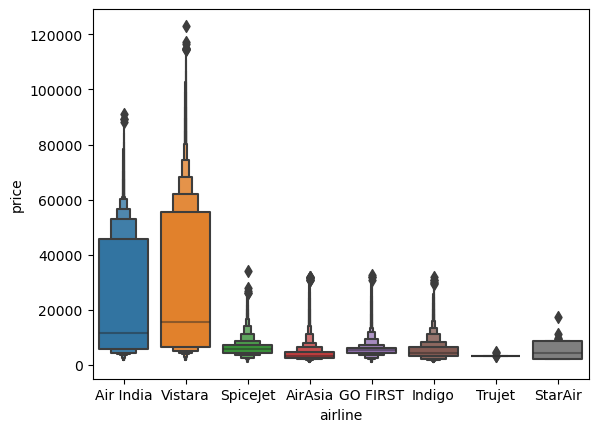

In [131]:
sns.boxenplot(data=df,y=df['price'],x=df['airline'])

### Does price vary depending on flight Duration?

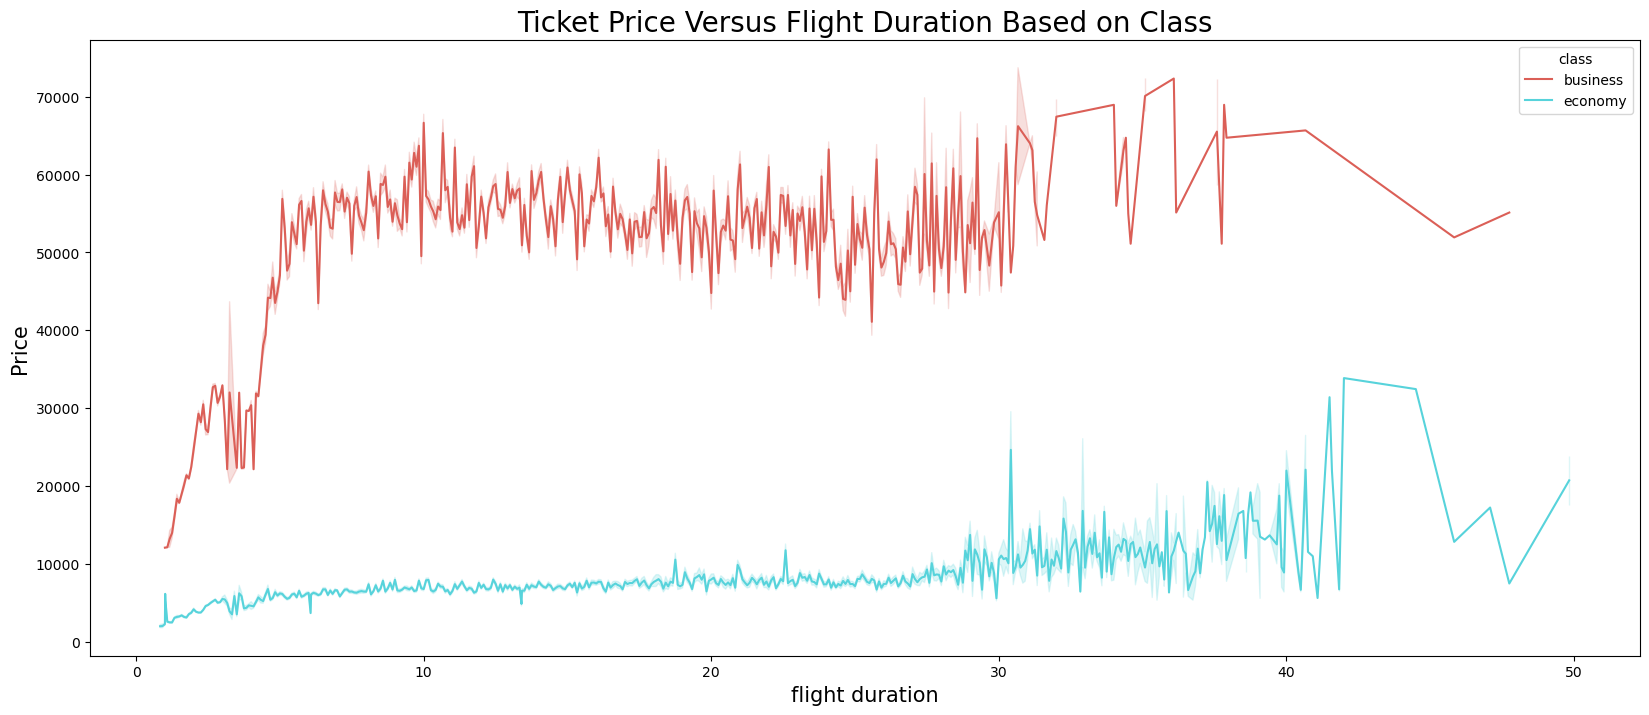

In [132]:
#plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,y=df['price'],x=df['flight duration'],hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('flight duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<AxesSubplot:xlabel='flight duration', ylabel='price'>

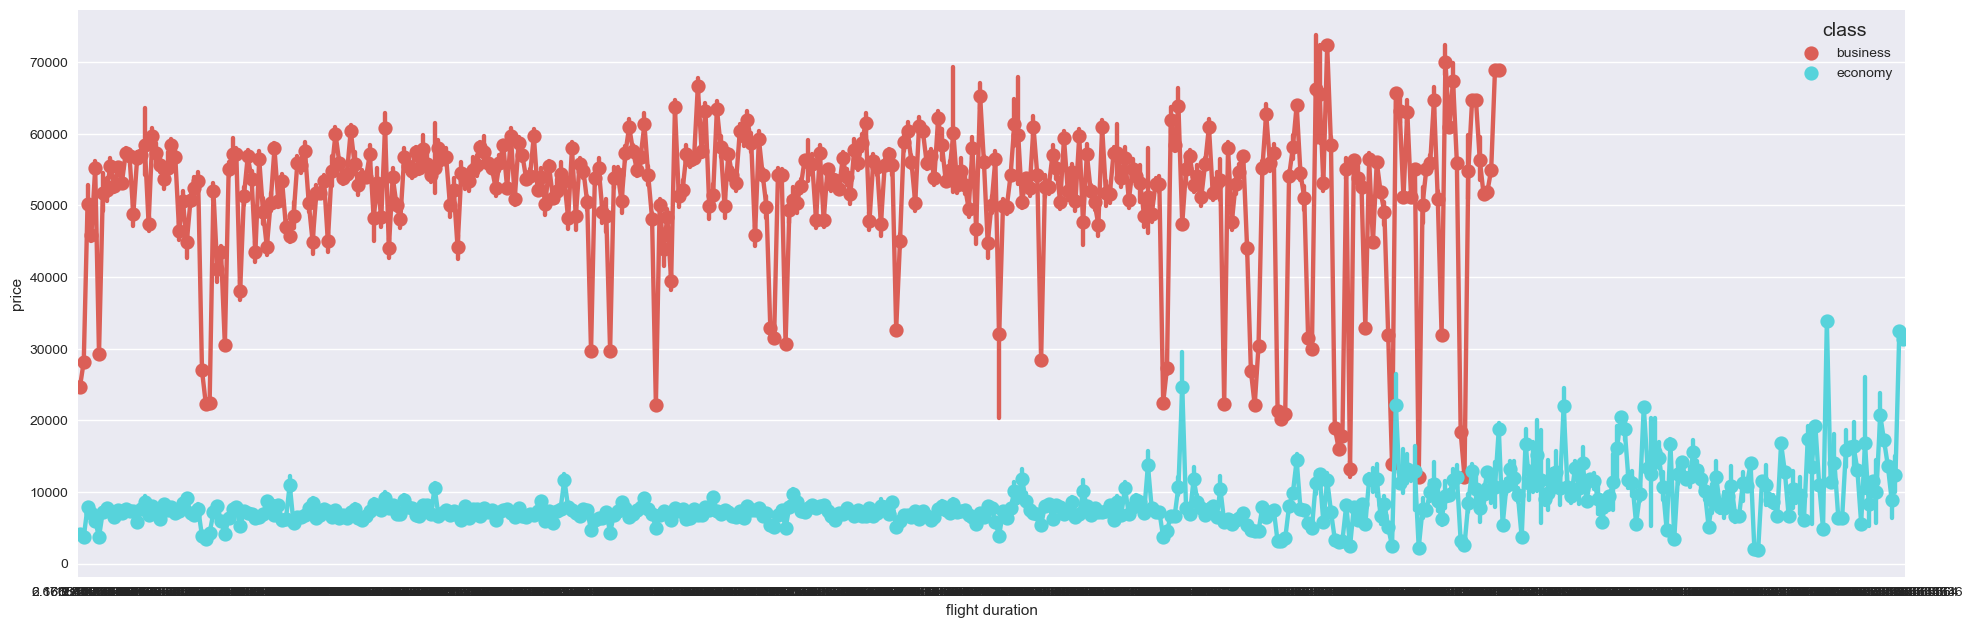

In [686]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(21,7))
sns.pointplot(data=df,y=df['price'],x=df['flight duration'],hue='class',palette='hls')


#### Does 

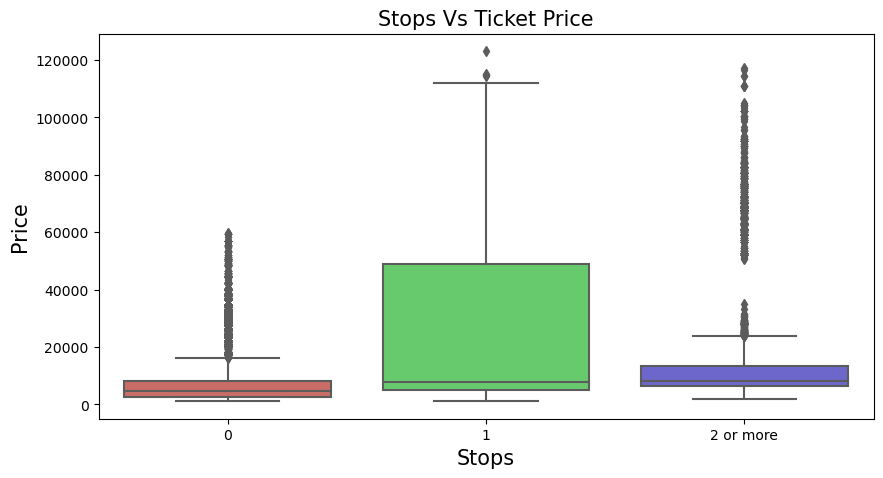

In [133]:

#plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.boxplot(x=df['if_stop'],y=df['price'],data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

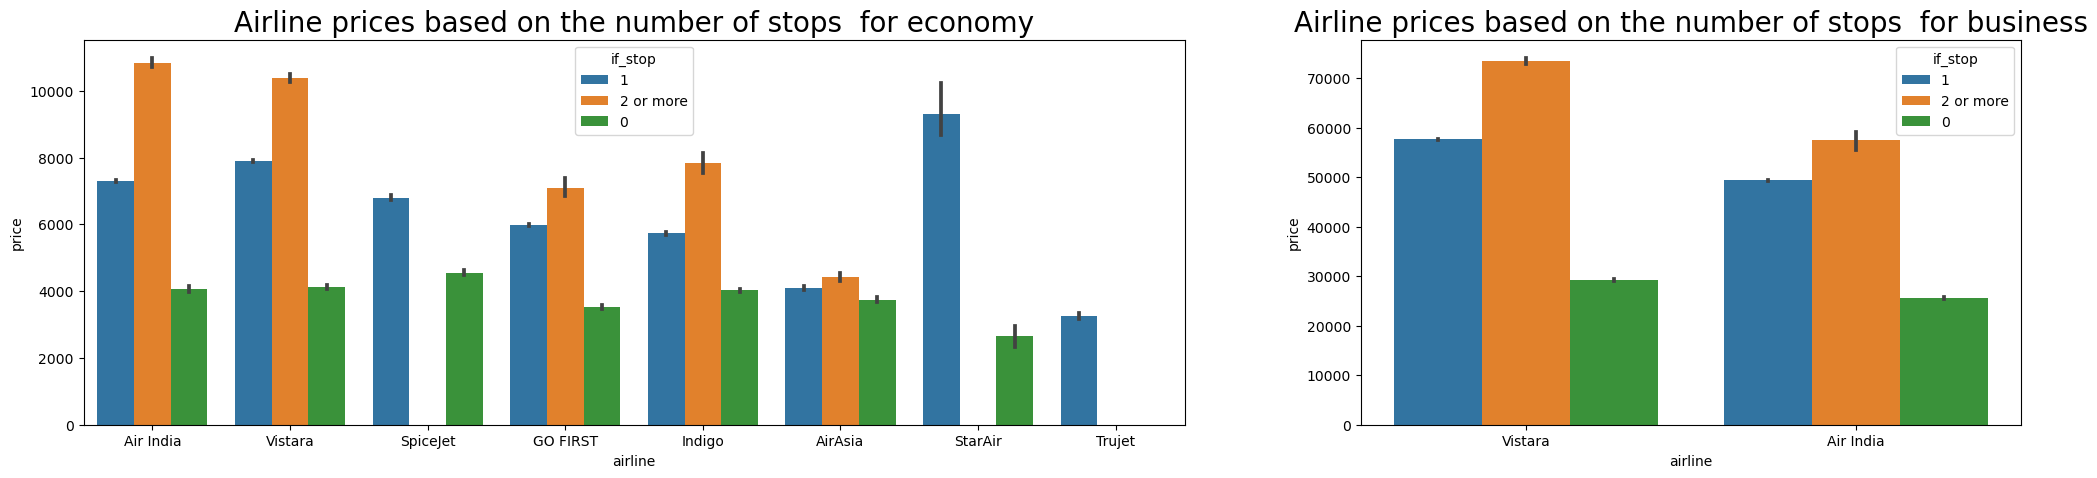

In [134]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="if_stop",data = df.loc[df["class"]=='economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="if_stop",data = df.loc[df["class"]=='business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

### How the price changes with change in Source and Destination?

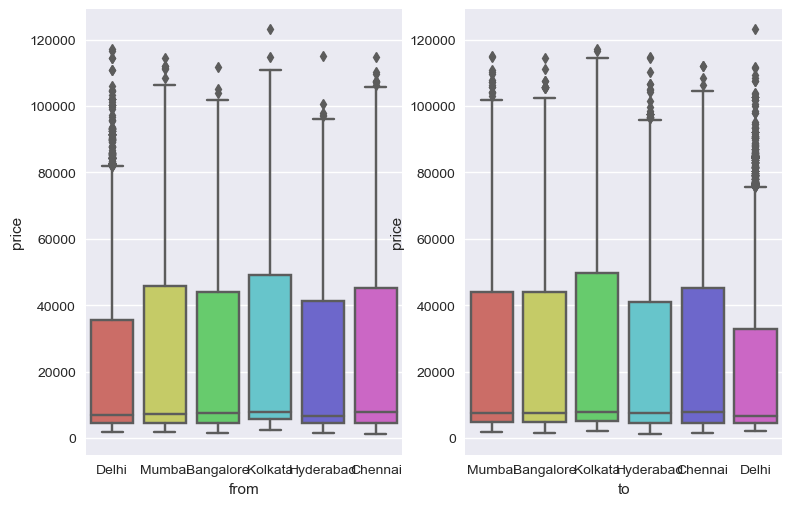

<Figure size 5000x5000 with 0 Axes>

In [400]:
plt.subplot(1,2,1)
sns.boxplot(x=df['from'],y=df['price'],data=df,palette='hls')
plt.subplot(1,2,2)
sns.boxplot(x=df['to'],y=df['price'],data=df,palette='hls')
plt.figure(figsize=(50,50))
plt.show()

<AxesSubplot:xlabel='distance', ylabel='price'>

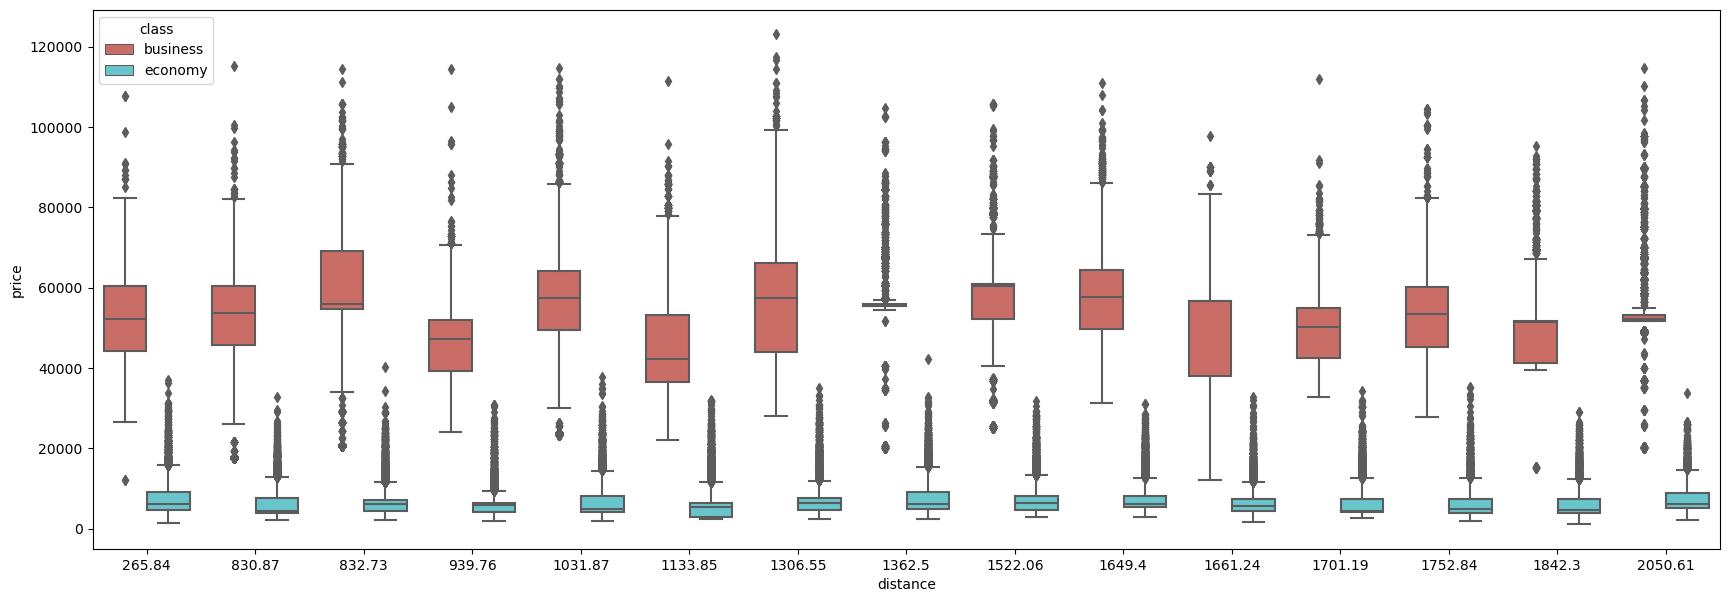

In [94]:

plt.figure(figsize=(21,7))
sns.boxplot(data=df,y=df['price'],x=df['distance'],hue='class',palette='hls')

### Does flights in weekends?

In [639]:
#average flights in weekends 

one=df.loc[df['weekends']==1]
len(one)/len(one['date'].unique())

6014.785714285715

In [638]:
#average flights in the rest of the week

zero=df.loc[df['weekends']==0]
len(zero)/len(zero['date'].unique())

6172.914285714286

In [677]:
zero.loc[(df['from']=='Delhi') & (df['to']=='Mumbai') & (df['days left']==39)]

,date,airline,flight code,departure time,arriving time,flight duration,from,to,class,if_stop,price,days left,weekends,distance
4078,21-03-2022,Vistara,UK-951,Afternoon,Afternoon,2.166667,Delhi,Mumbai,business,0,22152,39,0,1133.85
4079,21-03-2022,Vistara,UK-953,Evening,Night,2.166667,Delhi,Mumbai,business,0,22152,39,0,1133.85
4080,21-03-2022,Air India,AI-868,Evening,Evening,2.0,Delhi,Mumbai,business,0,22152,39,0,1133.85
4081,21-03-2022,Air India,AI-887,Early morning,morning,2.083333,Delhi,Mumbai,business,0,22152,39,0,1133.85
4082,21-03-2022,Air India,AI-665,Early morning,morning,2.166667,Delhi,Mumbai,business,0,22152,39,0,1133.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101376,21-03-2022,GO FIRST,G8-1010,Afternoon,Evening,5.833333,Delhi,Mumbai,economy,1,10609,39,0,1133.85
101377,21-03-2022,GO FIRST,G8-191,morning,Evening,8.916667,Delhi,Mumbai,economy,1,10609,39,0,1133.85
101378,21-03-2022,GO FIRST,G8-266,Early morning,Evening,11.75,Delhi,Mumbai,economy,1,10609,39,0,1133.85
101379,21-03-2022,GO FIRST,G8-213,morning,Evening,6.333333,Delhi,Mumbai,economy,1,11576,39,0,1133.85


### Does price varies by the flight distance based on class?

<AxesSubplot:xlabel='distance', ylabel='price'>

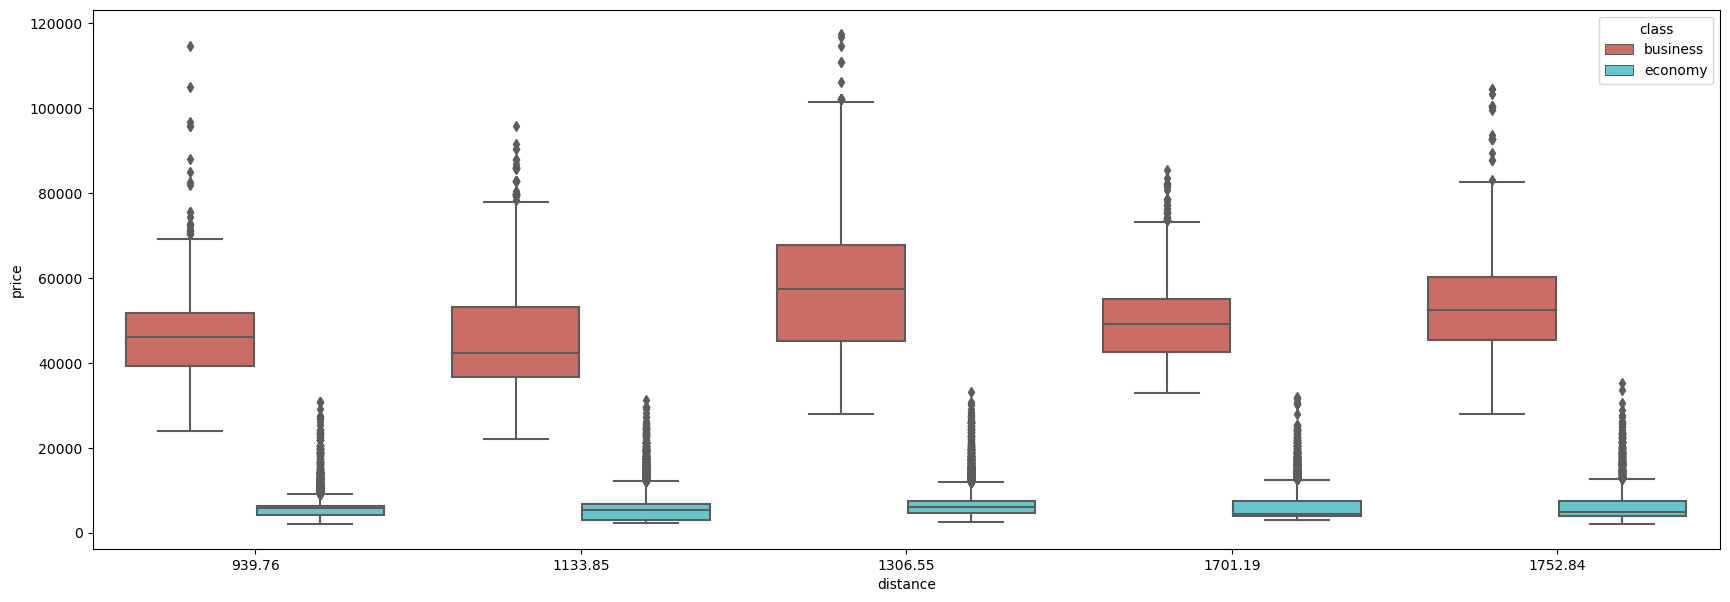

In [183]:
delhi=df[(df['from']=='Delhi')]
plt.figure(figsize=(21,7))
sns.boxplot(data=df,y=delhi['price'],x=delhi['distance'],hue='class',palette='hls')

<AxesSubplot:xlabel='distance', ylabel='price'>

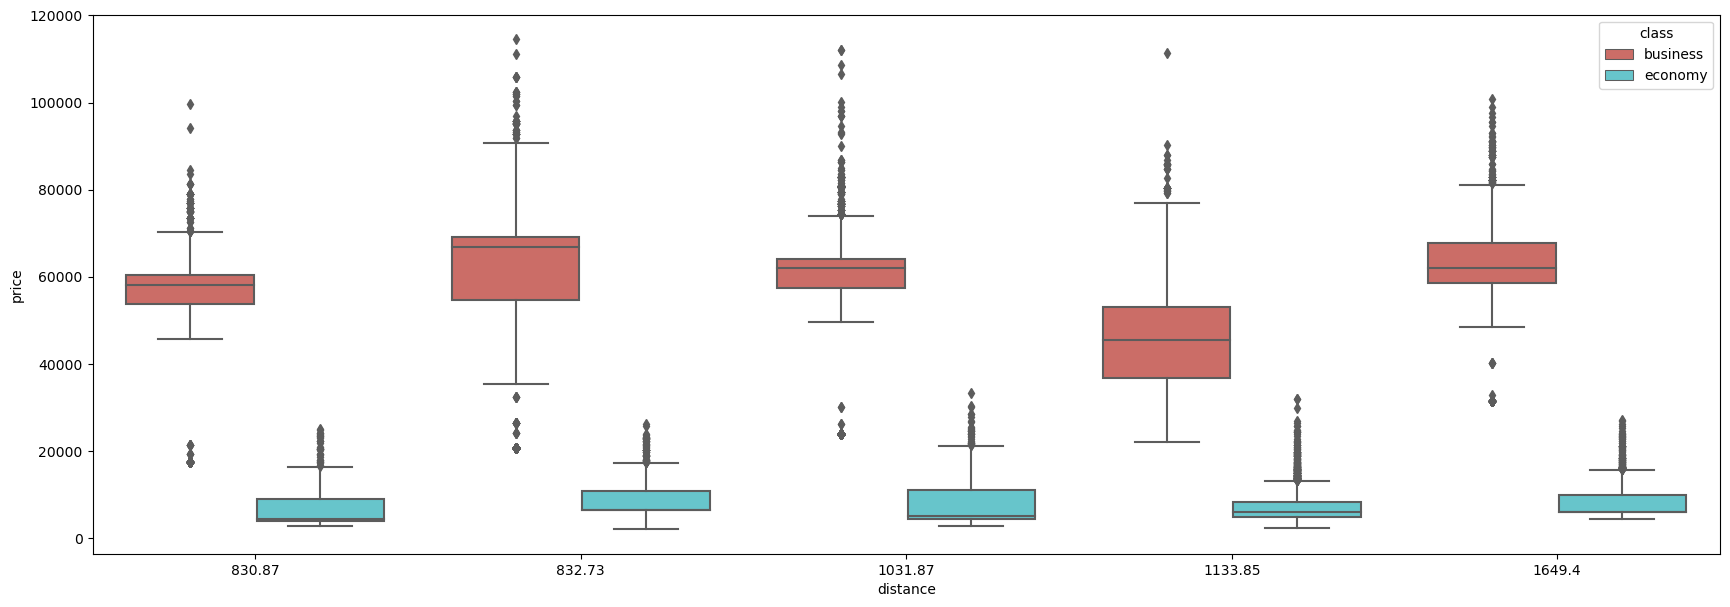

In [186]:
delhi=df[(df['from']=='Mumbai') & (df['airline']=='Vistara')]
plt.figure(figsize=(21,7))
sns.boxplot(data=df,y=delhi['price'],x=delhi['distance'],hue='class',palette='hls')

### How is the price affected when tickets are bought in just 1 or 2 days before departure?

<AxesSubplot:xlabel='days left', ylabel='price'>

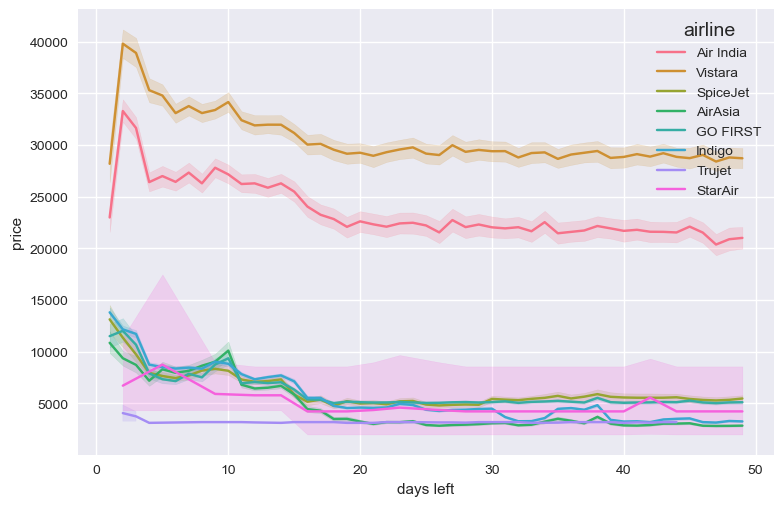

In [708]:
sns.lineplot(data=df,x=df['days left'],y=df['price'],hue=df['airline'])

# Modelling

In [69]:
model_df=df.drop(columns=['distance','weekends','date','flight code'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             300259 non-null  object 
 1   airline          300259 non-null  object 
 2   flight code      300259 non-null  object 
 3   departure time   300259 non-null  object 
 4   arriving time    300259 non-null  object 
 5   flight duration  300259 non-null  object 
 6   from             300259 non-null  object 
 7   to               300259 non-null  object 
 8   class            300259 non-null  object 
 9   if_stop          300259 non-null  object 
 10  price            300259 non-null  int64  
 11  days left        300259 non-null  int64  
 12  weekends         300259 non-null  int64  
 13  distance         300259 non-null  float64
dtypes: float64(1), int64(3), object(10)
memory usage: 32.1+ MB


In [71]:
model_df['flight duration']=model_df['flight duration'].astype(float)

In [72]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   airline          300259 non-null  object 
 1   departure time   300259 non-null  object 
 2   arriving time    300259 non-null  object 
 3   flight duration  300259 non-null  float64
 4   from             300259 non-null  object 
 5   to               300259 non-null  object 
 6   class            300259 non-null  object 
 7   if_stop          300259 non-null  object 
 8   price            300259 non-null  int64  
 9   days left        300259 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [73]:
model_df.describe()

,flight duration,price,days left
count,300259.000000,300259.000000,300259.000000
mean,12.217706,20883.800386,26.004529
std,7.192923,22695.962230,13.560967
min,0.833333,1105.000000,1.000000
25%,6.750000,4783.000000,15.000000
50%,11.250000,7425.000000,26.000000
75%,16.166667,42521.000000,38.000000
max,49.833333,123071.000000,49.000000


In [760]:
model_df['airline']=model_df['airline'].astype(object)
model_df['flight code']=model_df['flight code'].astype(object)
model_df['departure time']=model_df['departure time'].astype(object)
model_df['arriving time']=model_df['arriving time'].astype(object)
model_df['to']=model_df['to'].astype(object)
model_df['from']=model_df['from'].astype(object)
model_df['flight duration']=model_df['flight duration'].astype(float)

In [52]:
df['flight duration'].dtype

dtype('O')

In [ ]:
features = np.array(features).reshape((len(features), 1))

In [53]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
for col in model_df.columns:
    #col = np.array(col).reshape((-1, 1))
    if model_df[col].dtype=='object':
        model_df[col]=le.fit_transform(model_df[col])

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [75]:
# storing the Dependent Variables in X and Independent Variable in Y
x=model_df.drop(['price'],axis=1)
y=model_df['price']

In [176]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210181, 10), (90078, 10), (210181,), (90078,))

In [177]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [179]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [180]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
                'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4605.145
Mean Squared Error (MSE): 48756408.59
Root Mean Squared Error (RMSE): 6982.579
R2_score: 0.905229
Root Mean Squared Log Error (RMSLE): 8.851
Mean Absolute Percentage Error (MAPE): 43.44 %
Adj R Square:  0.905226
------------------------------------------------------------------------------------------------------------


C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1687.57
Mean Squared Error (MSE): 19407449.557
Root Mean Squared Error (RMSE): 4405.389
R2_score: 0.962276
Root Mean Squared Log Error (RMSLE): 8.391
Mean Absolute Percentage Error (MAPE): 13.15 %
Adj R Square:  0.962275
------------------------------------------------------------------------------------------------------------


C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1533.165
Mean Squared Error (MSE): 12388769.141
Root Mean Squared Error (RMSE): 3519.768
R2_score: 0.975919
Root Mean Squared Log Error (RMSLE): 8.166
Mean Absolute Percentage Error (MAPE): 11.63 %
Adj R Square:  0.975918
------------------------------------------------------------------------------------------------------------


C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1944.356
Mean Squared Error (MSE): 16580180.918
Root Mean Squared Error (RMSE): 4071.877
R2_score: 0.967772
Root Mean Squared Log Error (RMSLE): 8.312
Mean Absolute Percentage Error (MAPE): 11.58 %
Adj R Square:  0.967771
------------------------------------------------------------------------------------------------------------


C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 1426.892
Mean Squared Error (MSE): 10225267.781
Root Mean Squared Error (RMSE): 3197.697
R2_score: 0.980124
Root Mean Squared Log Error (RMSLE): 8.07
Mean Absolute Percentage Error (MAPE): 10.08 %
Adj R Square:  0.980123
------------------------------------------------------------------------------------------------------------


C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
c:\Users\Moataz2030\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Model Name:  GradientBoostingRegressor(loss='ls')
Mean Absolute Error (MAE): 2945.225
Mean Squared Error (MSE): 22966583.775
Root Mean Squared Error (RMSE): 4792.346
R2_score: 0.955358
Root Mean Squared Log Error (RMSLE): 8.475
Mean Absolute Percentage Error (MAPE): 23.15 %
Adj R Square:  0.955357
------------------------------------------------------------------------------------------------------------


C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
Mean Absolute Error (MAE): 2106.653
Mean Squared Error (MSE): 13740771.826
Root Mean Squared Error (RMSE): 3706.855
R2_score: 0.973291
Root Mean Squared Log Error (RMSLE): 8.218
Mean Absolute Percentage Error (MAPE): 16.54 %
Adj R Square:  0.97329
-----------------------------------

C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1580.813
Mean Squared Error (MSE): 13464893.408
Root Mean Squared Error (RMSE): 3669.454
R2_score: 0.973827
Root Mean Squared Log Error (RMSLE): 8.208
Mean Absolute Percentage Error (MAPE): 12.29 %
Adj R Square:  0.973826
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 4605.104
Mean Squared Error (MSE): 48756389.937
Root Mean Squared Error (RMSE): 6982.578
R2_score: 0.905229
Root Mean Squared Log Error (RMSLE): 8.851
Mean Absolute Percentage Error (MAPE): 43.44 %
Adj R Square:  0.905226
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 4604.867
Mean Squared Error (MSE): 48756225.041
Root Mean Squared Error (RMSE): 6982.566
R2_score: 0.905229
Root Mean Squared Log Error (RMSLE): 8.851
Mean Absolute Percentag

C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_40404\837745557.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [79]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["if_stop"] = df["if_stop"].replace({'zero':0,'one':1,'2 or more':2}).astype(int)
    df["class"] = df["class"].replace({'economy':0,'business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","from","to","departure time","arriving time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["airline","from","to","departure time","arriving time"],axis=1)
    
    return df

In [80]:
def load_data():
    # Read data
    #df = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%201/data/dataset.csv",index_col=0)
    # Preprocessing the data
    
    df = preprocessing(model_df)
    
    X = df.copy()
    y = X.pop("price")
    
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 1,test_size=0.3, shuffle=True)
    
    return xtrain,xtest,ytrain,ytest

In [81]:
xtrain,xtest,ytrain,ytest = load_data()

In [82]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models["XGBRegressor"]={"model":XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}
models["CatBoostRegressor"]={"model":CatBoostRegressor(logging_level ='Silent',iterations=500,random_state=1)}

In [83]:
def score_dataset(X, y, model=XGBRegressor()):
    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    
    score_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
    score_r2 = score_r2.mean()
    
    return score_r2

In [84]:
def get_scores(models,xtrain,ytrain):
    for name,model in models.items():
        model["model"].fit(xtrain,ytrain)

        score_r2 = score_dataset(xtrain, ytrain, model=model["model"])
        score = {'model':"Linear regression", 'score_r2':score_r2}
        print("--- "+name+" ---")
        print("Score r2: {}".format(score_r2))
        print("\n")

In [85]:
get_scores(models,xtrain,ytrain)

--- KNeighborsRegressor ---
Score r2: 0.7322383618335293


--- LinearRegression ---
Score r2: 0.9099412191451745


--- XGBRegressor ---
Score r2: 0.982177913978553


--- CatBoostRegressor ---
Score r2: 0.9731781666122817




In [86]:
model = models["XGBRegressor"]["model"]
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [87]:
r2_score(ytest,ypred)

0.9821522633825458

In [68]:
model_df

,airline,flight code,departure time,arriving time,flight duration,from,to,class,if_stop,price,days left
0,Air India,AI-868,Evening,Evening,2.000000,Delhi,Mumbai,1,0,25612,1
1,Air India,AI-624,Evening,Evening,2.250000,Delhi,Mumbai,1,0,25612,1
2,Air India,AI-531,Evening,Evening,24.750000,Delhi,Mumbai,1,1,42220,1
3,Air India,AI-839,Evening,Night,26.500000,Delhi,Mumbai,1,1,44450,1
4,Air India,AI-544,Afternoon,Night,6.666667,Delhi,Mumbai,1,1,46690,1
...,...,...,...,...,...,...,...,...,...,...,...
300254,Vistara,UK-832,Early morning,Evening,13.833333,Chennai,Hyderabad,0,1,7697,49
300255,Vistara,UK-832,Early morning,Evening,13.833333,Chennai,Hyderabad,0,1,7709,49
300256,Vistara,UK-826,Afternoon,morning,20.583333,Chennai,Hyderabad,0,1,8640,49
300257,Vistara,UK-822,morning,morning,23.333333,Chennai,Hyderabad,0,1,8640,49


In [90]:
model_df['from'].unique()


array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

Text(0, 0.5, 'Accuracy')

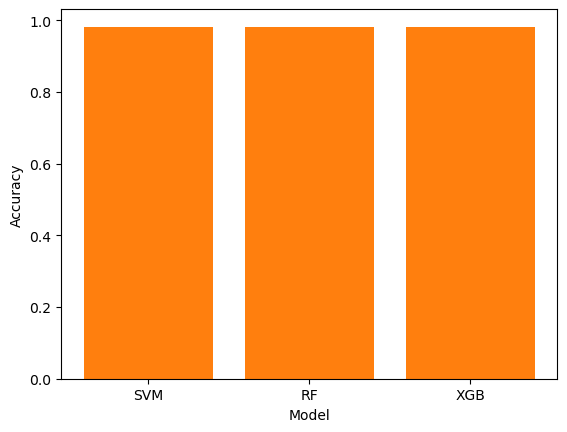

In [168]:
plt.bar(x=["SVM", "RF", "XGB"], height=0.982177913978553)
plt.bar(x=["SVM", "RF", "XGB"], height=r2_score(ytest,ypred))

plt.xlabel("Model")
plt.ylabel("Accuracy")

In [167]:
from sklearn.metrics import mean_absolute_error, r2_score

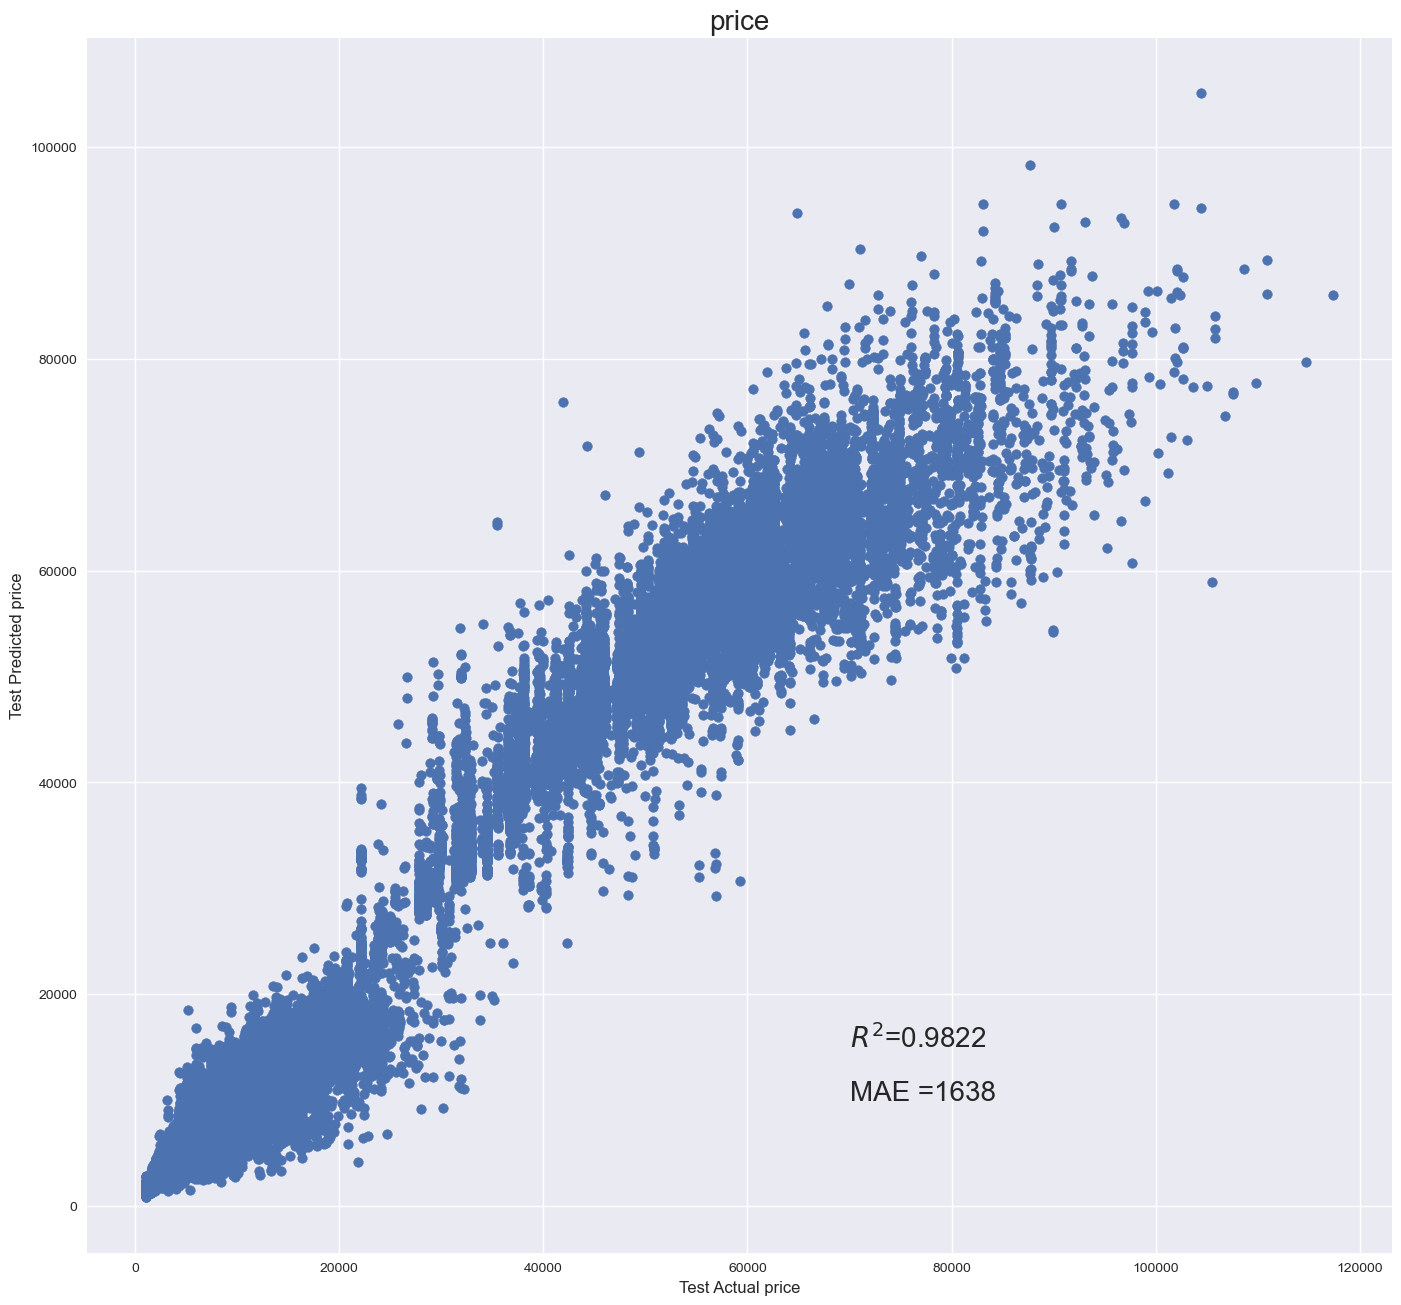

In [814]:
fig,ax = plt.subplots(figsize=(15,15))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(ytest,ypred)

score_r2 = r2_score(ytest, ypred) 
score_mae = mean_absolute_error(ytest, ypred)
plt.text(70000,15000,'$ R^{2} $=' + str(round(score_r2, 4)),fontsize=20)
plt.text(70000,10000,'MAE =' + str(round(score_mae)),fontsize=20)
plt.show()

In [201]:
models={
    #"knn":KNeighborsRegressor(),
    #"decisiontree":DecisionTreeRegressor(),
    #"randomforest":RandomForestRegressor(),
    "svr":SVR(),
    "xgb":XGBRegressor()
}


In [ ]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"using model:{name}")
    print(f"accuracy:{r2_score(y_test,y_pred)}")
    print("_"*30)

In [57]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210181, 10), (90078, 10), (210181,), (90078,))

In [58]:

models = {
    #'LogisticRegression': LogisticRegressor(),
    'SVR': SVR(),#tol=1e-6, C=0.6, gamma='auto', kernel='poly'),
    'DecisionTree': DecisionTreeRegressor(),
    # ccp_alpha, max_samples
    'RandomForest': RandomForestRegressor(),#n_estimators=40, max_depth=18, min_samples_split=5, min_samples_leaf=7, max_leaf_nodes=20, n_jobs=-1),

    'XGBoost': XGBRegressor()#n_estimators=10, max_depth=10, max_leaves=20, reg_alpha=1.5,eval_metric=r2_score)
}

train_acc = []
test_acc = []

# Training and evaluation
for name, model in models.items():
    model.fit(x_train, y_train)

    ypred = model.predict(x_test)
    ypred_train = model.predict(x_train)

    
    r2 = [r2_score(y_train, ypred_train), r2_score(y_test, ypred)]
    

    train_acc.append(r2_score(y_train, ypred_train))

    test_acc.append(r2_score(y_test, ypred))

    print(f"Model '{name}' Evaluation:")
    print(f"Accuracy: {r2}")
    print("_"*20)

In [190]:
import joblib

In [191]:
joblib.dump(modelETR,'model.h5' )

['model.h5']

In [47]:
model_df

NameError: name 'model_df' is not defined

# again

In [47]:
df

,date,airline,flight code,departure time,arriving time,flight duration,from,to,class,if_stop,price,days left,weekends,distance
0,11-02-2022,Air India,AI-868,Evening,Evening,2.0,Delhi,Mumbai,business,0,25612,1,0,1133.85
1,11-02-2022,Air India,AI-624,Evening,Evening,2.25,Delhi,Mumbai,business,0,25612,1,0,1133.85
2,11-02-2022,Air India,AI-531,Evening,Evening,24.75,Delhi,Mumbai,business,1,42220,1,0,1133.85
3,11-02-2022,Air India,AI-839,Evening,Night,26.5,Delhi,Mumbai,business,1,44450,1,0,1133.85
4,11-02-2022,Air India,AI-544,Afternoon,Night,6.666667,Delhi,Mumbai,business,1,46690,1,0,1133.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300254,31-03-2022,Vistara,UK-832,Early morning,Evening,13.833333,Chennai,Hyderabad,economy,1,7697,49,0,1842.30
300255,31-03-2022,Vistara,UK-832,Early morning,Evening,13.833333,Chennai,Hyderabad,economy,1,7709,49,0,1842.30
300256,31-03-2022,Vistara,UK-826,Afternoon,Morning,20.583333,Chennai,Hyderabad,economy,1,8640,49,0,1842.30
300257,31-03-2022,Vistara,UK-822,Morning,Morning,23.333333,Chennai,Hyderabad,economy,1,8640,49,0,1842.30


In [51]:
df2=df[['airline','departure time','arriving time','flight duration','from','to','class','if_stop','days left','price']]
df2

,airline,departure time,arriving time,flight duration,from,to,class,if_stop,days left,price
0,Air India,Evening,Evening,2.0,Delhi,Mumbai,business,0,1,25612
1,Air India,Evening,Evening,2.25,Delhi,Mumbai,business,0,1,25612
2,Air India,Evening,Evening,24.75,Delhi,Mumbai,business,1,1,42220
3,Air India,Evening,Night,26.5,Delhi,Mumbai,business,1,1,44450
4,Air India,Afternoon,Night,6.666667,Delhi,Mumbai,business,1,1,46690
...,...,...,...,...,...,...,...,...,...,...
300254,Vistara,Early morning,Evening,13.833333,Chennai,Hyderabad,economy,1,49,7697
300255,Vistara,Early morning,Evening,13.833333,Chennai,Hyderabad,economy,1,49,7709
300256,Vistara,Afternoon,Morning,20.583333,Chennai,Hyderabad,economy,1,49,8640
300257,Vistara,Morning,Morning,23.333333,Chennai,Hyderabad,economy,1,49,8640


In [52]:
df2['class']=df2['class'].map({'economy':0,'business':1})
df2['if_stop']=df2['if_stop'].map({'0' : 0 , '1' : 1 , '2 or more' : 2})
df2['flight duration']=df2['flight duration'].astype(float)

C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_58688\1242484488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['class']=df2['class'].map({'economy':0,'business':1})
C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_58688\1242484488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['if_stop']=df2['if_stop'].map({'0' : 0 , '1' : 1 , '2 or more' : 2})
C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_58688\1242484488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [53]:
df3=pd.get_dummies(df2,columns=['airline','departure time','arriving time','from','to',"if_stop"],drop_first=True)
df3

,flight duration,class,days left,price,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,...,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,if_stop_1,if_stop_2
0,2.000000,1,1,25612,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2.250000,1,1,25612,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,24.750000,1,1,42220,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,26.500000,1,1,44450,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,6.666667,1,1,46690,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300254,13.833333,0,49,7697,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
300255,13.833333,0,49,7709,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
300256,20.583333,0,49,8640,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
300257,23.333333,0,49,8640,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   airline          300259 non-null  object 
 1   departure time   300259 non-null  object 
 2   arriving time    300259 non-null  object 
 3   flight duration  300259 non-null  float64
 4   from             300259 non-null  object 
 5   to               300259 non-null  object 
 6   class            300259 non-null  int64  
 7   if_stop          300259 non-null  int64  
 8   days left        300259 non-null  int64  
 9   price            300259 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 22.9+ MB


In [66]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
for col in df2.columns:
    #col = np.array(col).reshape((-1, 1))
    if df2[col].dtype=='object':
        df2[col]=le.fit_transform(df2[col])

C:\Users\Moataz2030\AppData\Local\Temp\ipykernel_58688\1296584653.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=le.fit_transform(df2[col])


In [67]:
df2

,airline,departure time,arriving time,flight duration,from,to,class,if_stop,days left,price
0,0,2,2,2.000000,2,5,1,0,1,25612
1,0,2,2,2.250000,2,5,1,0,1,25612
2,0,2,2,24.750000,2,5,1,1,1,42220
3,0,2,4,26.500000,2,5,1,1,1,44450
4,0,0,4,6.666667,2,5,1,1,1,46690
...,...,...,...,...,...,...,...,...,...,...
300254,7,1,2,13.833333,1,3,0,1,49,7697
300255,7,1,2,13.833333,1,3,0,1,49,7709
300256,7,0,3,20.583333,1,3,0,1,49,8640
300257,7,3,3,23.333333,1,3,0,1,49,8640


In [68]:
x=df2.drop(columns=['price'])
y=df2['price']

In [75]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.3)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV

In [77]:
models={
    "Linear":LinearRegression(),
    "knn":KNeighborsRegressor(),
    "decisiontree":DecisionTreeRegressor(),
    "randomforest":RandomForestRegressor(),
    "xgb":XGBRegressor()
}


In [78]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train = model.predict(x_train)
    print(f"using model:{name}")
    print(f"train accuracy:{r2_score(y_train,y_pred_train)}")
    print(f"test accuracy:{r2_score(y_test,y_pred)}")
    
    print("_"*30)

using model:Linear
train accuracy:0.906189503958917
test accuracy:0.9062424585407046
______________________________
using model:knn
train accuracy:0.8046546426513985
test accuracy:0.6888774043188213
______________________________
using model:decisiontree
train accuracy:0.9994143636544276
test accuracy:0.9770929396099557
______________________________
using model:randomforest
train accuracy:0.9975525071387423
test accuracy:0.9854688647327333
______________________________
using model:xgb
train accuracy:0.976792311460314
test accuracy:0.9756344797405573
______________________________


In [ ]:
params = {'max_depth': [3,4,5,6], 'min_samples_leaf': [0.02,0.03,0.04,0.06,0.08,0.3,0.4]}

In [85]:

model = DecisionTreeRegressor()
parameters = {
    'max_depth': [5, 10, 15, 20],
    'max_leaf_nodes': [10, 15, 20, 25,35],
    'min_samples_leaf': [0.02,0.03,0.04,0.06,0.08,0.3,0.4]
}


grid = GridSearchCV(model, parameters)
grid.fit(x_train,y_train)
r2_train = grid.score(x_train, y_train)
r2_test = grid.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

R2 Score of Decision Tree Training: 0.9415342386166281
R2 Score of Decision Tree Test: 0.9415764108333793


In [86]:
grid.best_params_

{'max_depth': 10, 'max_leaf_nodes': 25, 'min_samples_leaf': 0.02}

In [79]:
model = RandomForestRegressor()
parameters = {
    'max_depth': [5, 10, 15, 20],
    'max_leaf_nodes': [10, 15, 20, 25,35],
    'min_samples_leaf': [0.02,0.03,0.04,0.06,0.08,0.3,0.4]
}


grid = GridSearchCV(model, parameters)
grid.fit(x_train,y_train)
r2_train = grid.score(x_train, y_train)
r2_test = grid.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

In [88]:
from xgboost import XGBRegressor

model = XGBRegressor()
parameters = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [10, 15, 20, 25,35],
    'max_leaves': [10, 15, 20, 25]
}
grid = GridSearchCV(model, parameters)
grid.fit(x_train,y_train)
r2_train = grid.score(x_train, y_train)
r2_test = grid.score(x_test, y_test)

print(f"R2 Score of XGBoost Training: {r2_train}")
print(f"R2 Score of XGBoost Test: {r2_test}")

ValueError: 
All the 400 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1014, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\sklearn.py", line 448, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\sklearn.py", line 934, in _create_dmatrix
    return DMatrix(**kwargs, nthread=self.n_jobs)
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\core.py", line 743, in __init__
    handle, feature_names, feature_types = dispatch_data_backend(
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\data.py", line 957, in dispatch_data_backend
    return _from_pandas_df(data, enable_categorical, missing, threads,
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\data.py", line 404, in _from_pandas_df
    data, feature_names, feature_types = _transform_pandas_df(
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\data.py", line 378, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\xgboost\data.py", line 270, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:flight duration: object
